1. Spam Data

        a. Load the spam data set.
        b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
        c. Is there any overlap in the bigrams for the spam data and the ham data?
        d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [1]:
import re
import unicodedata
import pandas as pd
import nltk
from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

# a. Load the spam data set.
df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
df['cleaned_text'] = df['text'].apply(clean)
df.head()

,label,text,cleaned_text
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,"[dun, say, early, hor, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"


In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [8]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [9]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,600,241,359
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
4,287,168,119
dont,279,257,22
ok,277,272,5
free,275,59,216
know,267,241,26


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

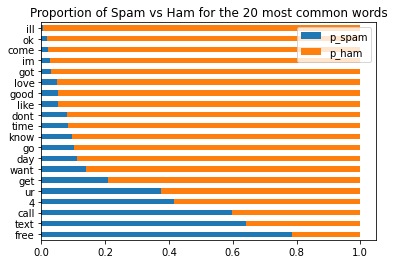

In [11]:
# c. Is there any overlap in the bigrams for the spam data and the ham data?
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

In [18]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [19]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

In [20]:
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

(-0.5, 799.5, 599.5, -0.5)

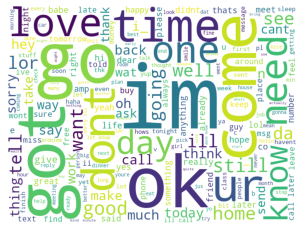

In [22]:
plt.imshow(ham_cloud)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

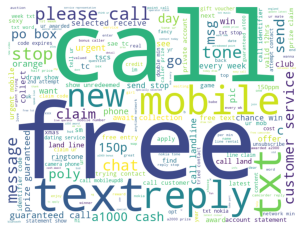

In [23]:
plt.imshow(spam_cloud)
plt.axis('off')

d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [24]:
top_20_spam_bigrams_3 = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))
top_20_spam_bigrams_3.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
dtype: int64

In [25]:
top_20_ham_bigrams_3 = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))
top_20_ham_bigrams_3.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
dtype: int64

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [48]:
blog = pd.read_csv('clean_blog_posts.csv')
blog.head()

,title,content,date_published,clean,stemmed,lemmatized
0,Mental Health First Aid Training - Codeup,\n\n\n\n\n\nMental Health First Aid Training\n...,"May 31, 2022",mental health first aid training may 31 2022 t...,mental health first aid train may 31 2022 tip ...,mental health first aid training may 31 2022 t...
1,5 Reasons To Attend Our New Cloud Administrati...,\n\n\n\n\n\n5 Reasons To Attend Our New Cloud ...,"May 17, 2022",5 reasons attend new cloud administration prog...,5 reason attend new cloud administr program ma...,5 reason attend new cloud administration progr...
2,What Jobs Can You Get After a Coding Bootcamp?,\n\n\n\n\n\nWhat Jobs Can You Get After a Codi...,"Jul 7, 2022",jobs get coding bootcamp part 1 data science j...,job get code bootcamp part 1 data scienc jul 7...,job get coding bootcamp part 1 data science ju...
3,What Jobs Can You Get After a Coding Bootcamp?...,\n\n\n\n\n\nWhat Jobs Can You Get After a Codi...,"Jul 14, 2022",jobs get coding bootcamp part 2 cloud administ...,job get code bootcamp part 2 cloud administr j...,job get coding bootcamp part 2 cloud administr...
4,Codeup TV Commercial - Codeup News,"\n\n\n\n\n\nCodeup TV Commercial\nJul 20, 2022...","Jul 20, 2022",codeup tv commercial jul 20 2022 codeup news c...,codeup tv commerci jul 20 2022 codeup news cod...,codeup tv commercial jul 20 2022 codeup news c...


In [49]:
cols = ['lemmatized','stemmed','content']
blog = blog.drop(columns = cols)
blog.head()

,title,date_published,clean
0,Mental Health First Aid Training - Codeup,"May 31, 2022",mental health first aid training may 31 2022 t...
1,5 Reasons To Attend Our New Cloud Administrati...,"May 17, 2022",5 reasons attend new cloud administration prog...
2,What Jobs Can You Get After a Coding Bootcamp?,"Jul 7, 2022",jobs get coding bootcamp part 1 data science j...
3,What Jobs Can You Get After a Coding Bootcamp?...,"Jul 14, 2022",jobs get coding bootcamp part 2 cloud administ...
4,Codeup TV Commercial - Codeup News,"Jul 20, 2022",codeup tv commercial jul 20 2022 codeup news c...


In [67]:
blog_words_count = pd.Series(blog_words).value_counts()
blog_words_count.head(20)

cloud             56
codeup            34
data              28
program           27
career            24
salary            23
job               20
administration    19
get               17
new               17
science           15
web               15
student           14
entrylevel        13
development       13
company           12
part              11
mental            11
campus            11
according         11
dtype: int64

(-0.5, 799.5, 599.5, -0.5)

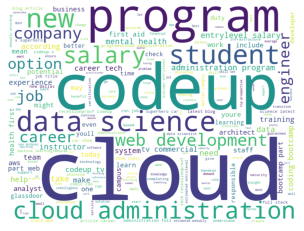

In [53]:
blog_words = clean(' '.join(blog.clean))
blog_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(blog_words))
plt.imshow(blog_cloud)
plt.axis('off')

In [66]:
top_20_bigrams_2 = (pd.Series(nltk.ngrams(blog_words, 2))
                      .value_counts()
                      .head(20))

top_20_bigrams_2.head(20)

(data, science)              15
(cloud, administration)      14
(web, development)           13
(entrylevel, salary)         10
(administration, program)    10
(mental, health)              9
(tv, commercial)              8
(codeup, tv)                  8
(coding, bootcamp)            8
(career, tech)                8
(bootcamp, part)              7
(get, coding)                 7
(job, get)                    7
(health, first)               6
(3, web)                      6
(part, 3)                     6
(first, aid)                  6
(campus, codeup)              5
(dallas, campus)              5
(new, dallas)                 5
dtype: int64

In [68]:
top_20_bigrams_3 = (pd.Series(nltk.ngrams(blog_words, 3))
                      .value_counts()
                      .head(20))

top_20_bigrams_3.head(20)

(cloud, administration, program)    10
(codeup, tv, commercial)             8
(job, get, coding)                   7
(get, coding, bootcamp)              7
(coding, bootcamp, part)             7
(mental, health, first)              6
(part, 3, web)                       6
(3, web, development)                6
(health, first, aid)                 6
(development, data, science)         5
(data, science, latest)              5
(recessionproof, codeup, x)          5
(science, latest, blog)              5
(web, development, data)             5
(stack, web, development)            5
(full, stack, web)                   5
(latest, blog, article)              5
(blog, article, career)              5
(article, career, tech)              5
(career, tech, recessionproof)       5
dtype: int64

Text(0.5, 0, '# Occurances')

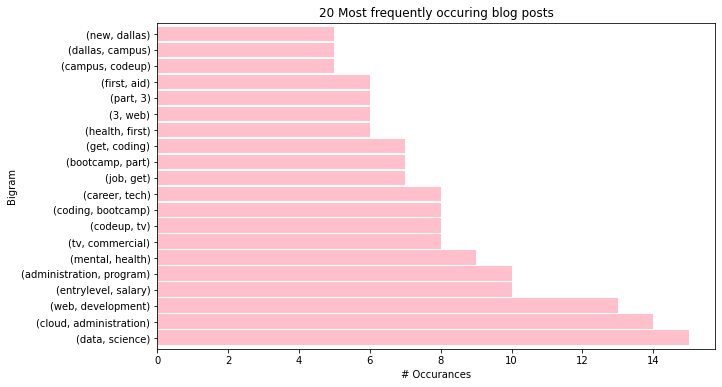

In [76]:
top_20_bigrams_2.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring blog posts')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [79]:
news = pd.read_csv('clean_news.csv')
news.head()

,title,content,author,date,category,clean,stemmed,lemmatized
0,Don't eff this up: Bezos recalls warning from ...,Ahead of the debut of The Lord of the Rings' p...,Ridham Gambhir,2022-09-01T11:38:25.000Z,business,ahead debut lord rings ' prequel ' rings power...,ahead debut lord ring ' prequel ' ring power '...,ahead debut lord ring ' prequel ' ring power '...
1,US sought records on Binance CEO for crypto mo...,US prosecutors sought communication records in...,Ashley Paul,2022-09-01T15:22:36.000Z,business,us prosecutors sought communication records in...,us prosecutor sought commun record involv bina...,u prosecutor sought communication record invol...
2,Price of commercial LPG cylinders cut by up to...,State-owned fuel retailers on Thursday announc...,Ridham Gambhir,2022-09-01T06:15:11.000Z,business,stateowned fuel retailers thursday announced r...,stateown fuel retail thursday announc reduct p...,stateowned fuel retailer thursday announced re...
3,Chairman of Russia's 2nd largest oil firm dies...,The chairman of Russia's second-largest oil pr...,Ridham Gambhir,2022-09-01T09:40:09.000Z,business,chairman russia ' secondlargest oil producer l...,chairman russia ' secondlargest oil produc luk...,chairman russia ' secondlargest oil producer l...
4,"Reliance acquires Campa, marking entry into FM...",Reliance Industries has reportedly acquired so...,Ridham Gambhir,2022-09-01T13:34:14.000Z,business,reliance industries reportedly acquired soft d...,relianc industri reportedli acquir soft drink ...,reliance industry reportedly acquired soft dri...


In [80]:
cols = ['lemmatized','stemmed','content']
news = news.drop(columns = cols)
news.head()

,title,author,date,category,clean
0,Don't eff this up: Bezos recalls warning from ...,Ridham Gambhir,2022-09-01T11:38:25.000Z,business,ahead debut lord rings ' prequel ' rings power...
1,US sought records on Binance CEO for crypto mo...,Ashley Paul,2022-09-01T15:22:36.000Z,business,us prosecutors sought communication records in...
2,Price of commercial LPG cylinders cut by up to...,Ridham Gambhir,2022-09-01T06:15:11.000Z,business,stateowned fuel retailers thursday announced r...
3,Chairman of Russia's 2nd largest oil firm dies...,Ridham Gambhir,2022-09-01T09:40:09.000Z,business,chairman russia ' secondlargest oil producer l...
4,"Reliance acquires Campa, marking entry into FM...",Ridham Gambhir,2022-09-01T13:34:14.000Z,business,reliance industries reportedly acquired soft d...
